In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

titanic_path = kagglehub.competition_download('titanic')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
plt.style.use('ggplot')

from collections import Counter

import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/tmp/ipykernel_32/3278402363.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [ ]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')
test_passenger=test_df['PassengerId']

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data setimizdeki kategorik ve numerik feature'lar:
Kategorik:Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked
Numerik:PassengerId,Age,Fare

In [ ]:
def draw_bar(feature):
    feature_1=feature.value_counts()
    feature_12=feature.value_counts().index

    plt.figure(figsize=(9,3))
    plt.bar(feature_12,feature_1)
    plt.xticks(feature_1.index, feature_1.index.values)
    plt.ylabel("Frequency")
    plt.show()
    print("{}/n".format(feature_1))


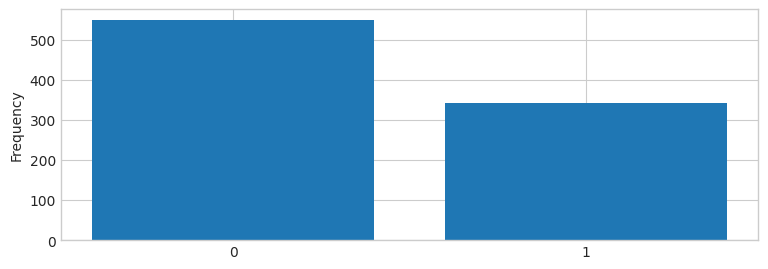

Survived
0    549
1    342
Name: count, dtype: int64/n


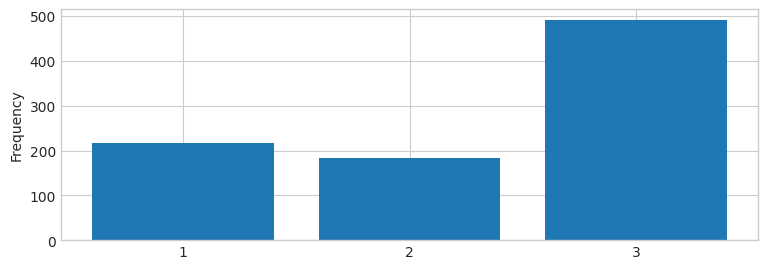

Pclass
3    491
1    216
2    184
Name: count, dtype: int64/n


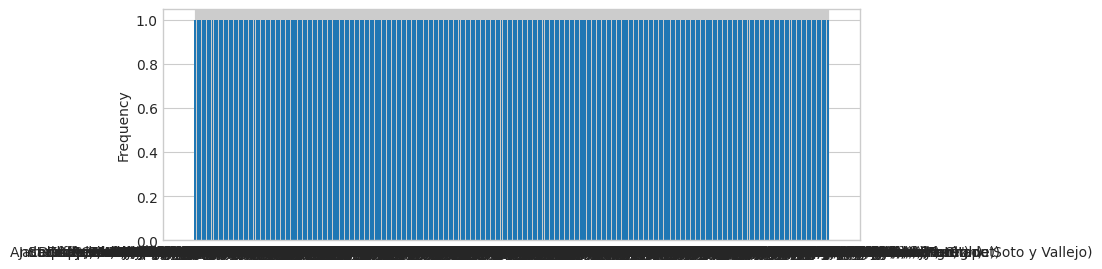

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64/n


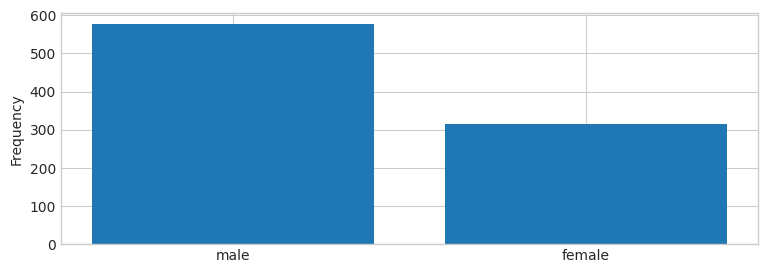

Sex
male      577
female    314
Name: count, dtype: int64/n


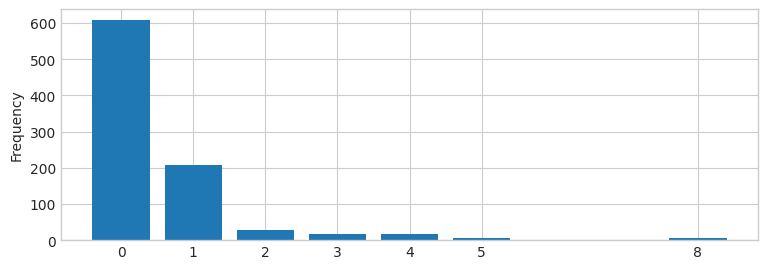

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64/n


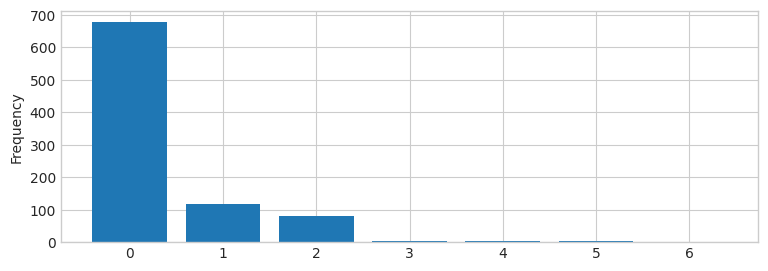

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64/n


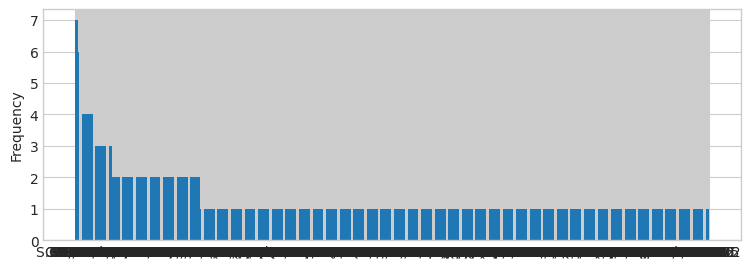

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64/n


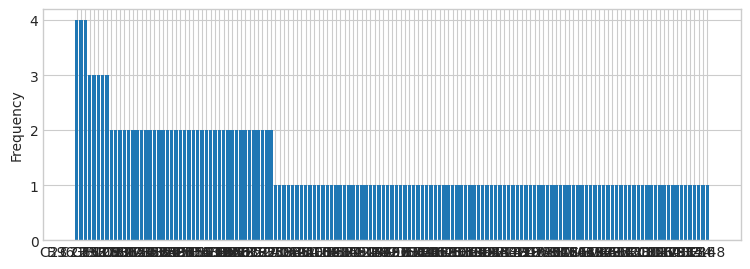

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64/n


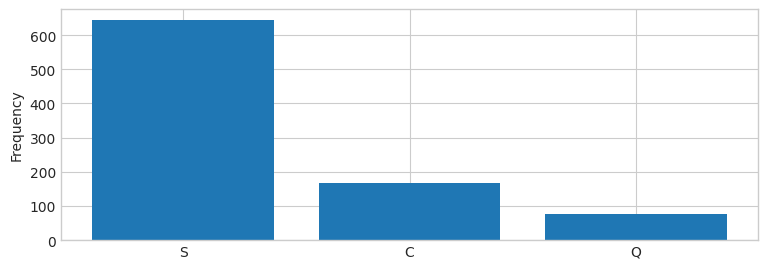

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64/n


In [ ]:
categoric_variable=['Survived','Pclass','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked']
for n in categoric_variable:
    draw_bar(train_df[n])

In [ ]:
def draw_hist(feature):
    plt.figure(figsize=(9,3))
    plt.hist(feature,color='r')
    plt.xlabel(feature.name)
    plt.ylabel('frequency')
    plt.show()

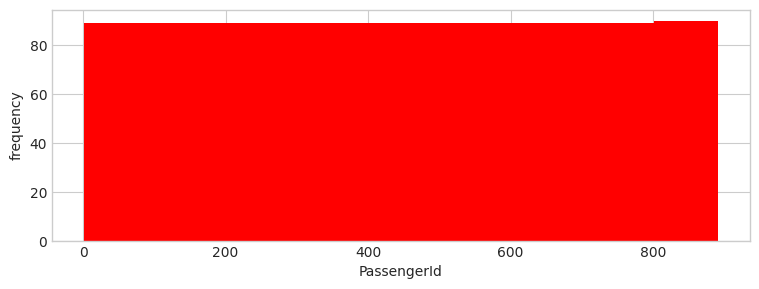

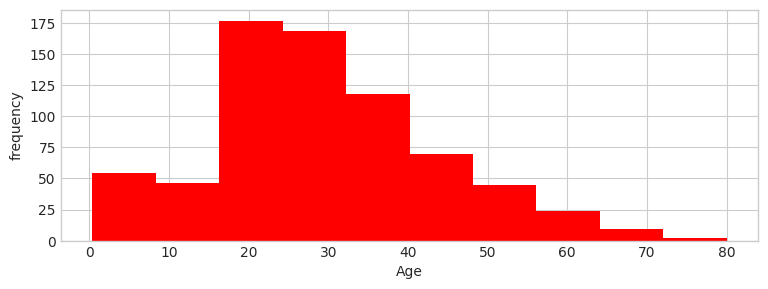

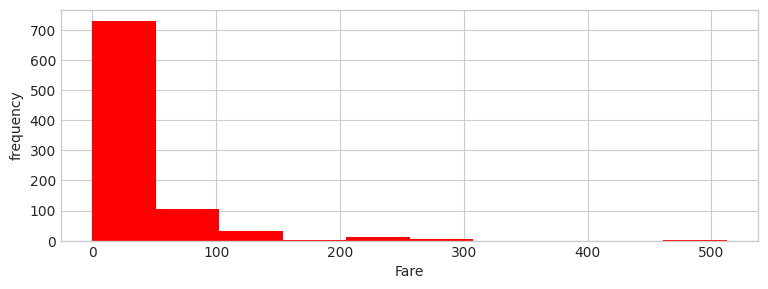

In [ ]:
numerical_variable=['PassengerId','Age','Fare']
for n in numerical_variable:
    draw_hist(train_df[n])

In [ ]:
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
df=train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived")
df['Rate of sex']=train_df['Sex'].value_counts().apply(lambda n:n/891).values
df

,Sex,Survived,Rate of sex
1,male,0.188908,0.647587
0,female,0.742038,0.352413


In [ ]:
df=train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived")

Sex
male      0.647587
female    0.352413
Name: count, dtype: float64

In [ ]:
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Parch")

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [ ]:
train_df[['Sex','Parch','Survived']].groupby(['Sex','Parch']).mean()

Survived
Sex    Parch          
female 0      0.788660
       1      0.766667
       2      0.612245
       3      0.750000
       4      0.000000
       5      0.250000
       6      0.000000
male   0      0.165289
       1      0.327586
       2      0.322581
       3      0.000000
       4      0.000000
       5      0.000000

In [ ]:
train_df[['SibSp','Pclass','Survived','Age']].groupby(['SibSp','Pclass']).mean()

Survived        Age
SibSp Pclass                     
0     1       0.562044  39.181416
      2       0.416667  31.934220
      3       0.236467  27.630201
1     1       0.746479  37.414154
      2       0.581818  27.363636
      3       0.325301  24.912698
2     1       0.800000  37.200000
      2       0.500000  19.125000
      3       0.333333  18.875000
3     1       0.666667  22.000000
      2       1.000000  30.000000
      3       0.083333   8.875000
4     3       0.166667   7.055556
5     3       0.000000  10.200000
8     3       0.000000        NaN

In [ ]:
def draw_boxplot(feature):


<Axes: title={'center': 'SibSp'}, xlabel='Survived'>

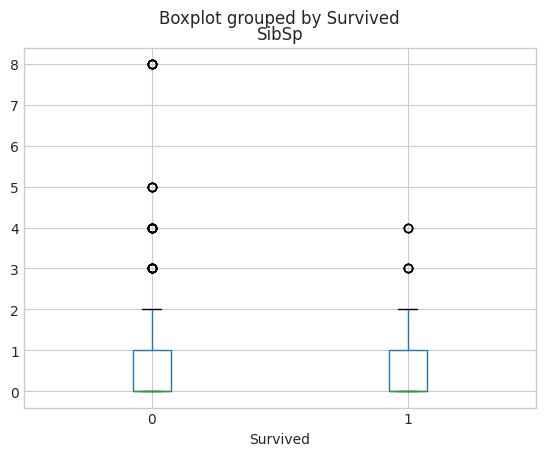

In [ ]:
train_df.boxplot(column='SibSp',by='Survived')

In [ ]:
def find_outlier(data):
    indis=[]
    for n in data.columns:
        q1=data[n].quantile(0.25)
        q3=data[n].quantile(0.75)
        iqr=q3-q1
        top_border=q3+1.5*iqr
        bottom_border=q1-1.5*iqr
        indis=np.concatenate((indis,data[(data[n]<bottom_border)|(data[n]>top_border)].index.values))

    indis1=Counter(indis)
    li1=list(i for i,v in  indis1.items() if v>2)
    return li1


In [ ]:
train_df2=train_df[['Age','SibSp','Parch','Fare']].copy()
train_df2.drop(find_outlier(train_df2),axis=0,inplace=True)
print(846 in train_df2.index)

False


In [ ]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_data=pd.concat([train_df,test_df])

In [ ]:
train_data[(train_data['Fare']>75)&(train_data['Fare']<85)]['Embarked'].value_counts()

Embarked
C    25
S    18
Name: count, dtype: int64

In [ ]:
train_data['Embarked'].fillna('C',inplace=True)

In [ ]:
train_data['Embarked'].isnull().sum()

0

In [ ]:
train_data[train_data['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [ ]:
train_data['Fare'].fillna(train_data[(train_data['Embarked']=='S')&(train_data['Pclass']==3)&(train_data['SibSp']==0)&(train_data['Parch']==0)]['Fare'].mean(),inplace=True)

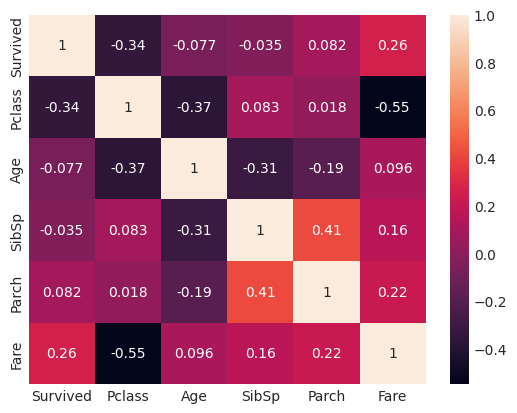

In [ ]:
#Korelasyon Matrisi
correlation=train_df[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr()
sns.heatmap(correlation,annot=True)
plt.show()

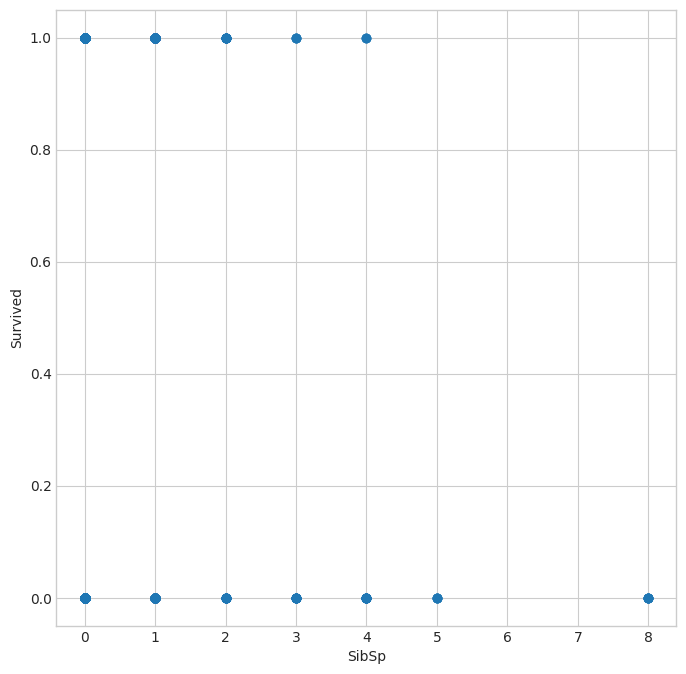

In [ ]:
#SibSp ve Survive arasındaki scatter plot grafiği
fig=plt.figure(figsize=(8,8))
plt.scatter(x=train_df.SibSp,y=train_df.Survived)
plt.xlabel('SibSp')
plt.ylabel('Survived')
plt.show()

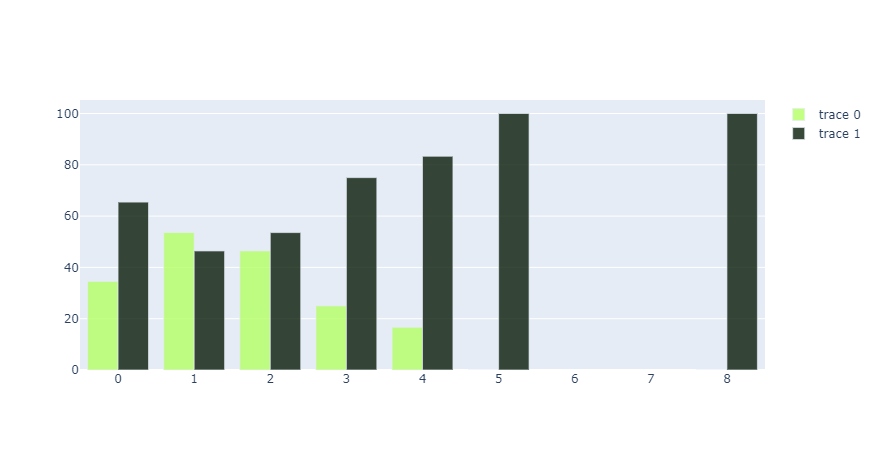

In [ ]:
#SibSp kategorik değişkeninin sınıflarına göre ölüm oranlarının görselleştirilmesi
percent_live=[100*(len(train_df[(train_df['SibSp']==i)&(train_df['Survived']==1)]))/len(train_df[train_df['SibSp']==i]) for i in train_df['SibSp'].value_counts().index]
percent_live1=[100*(len(train_df[(train_df['SibSp']==i)&(train_df['Survived']==0)]))/len(train_df[train_df['SibSp']==i]) for i in train_df['SibSp'].value_counts().index]
data=[go.Bar(
    x=train_df['SibSp'].value_counts().index,
    y=percent_live,
    marker=dict(
              color = 'rgba(180, 279, 100, 0.8)'
          ),
),go.Bar(
    x=train_df['SibSp'].value_counts().index,
    y=percent_live1,
    marker=dict(
              color = 'rgba(8, 28, 8, 0.8)'
          ),
)]
#layout=go.Layout(barmode='group')
#fig=dict(data=data,layout=layout)
iplot(data)

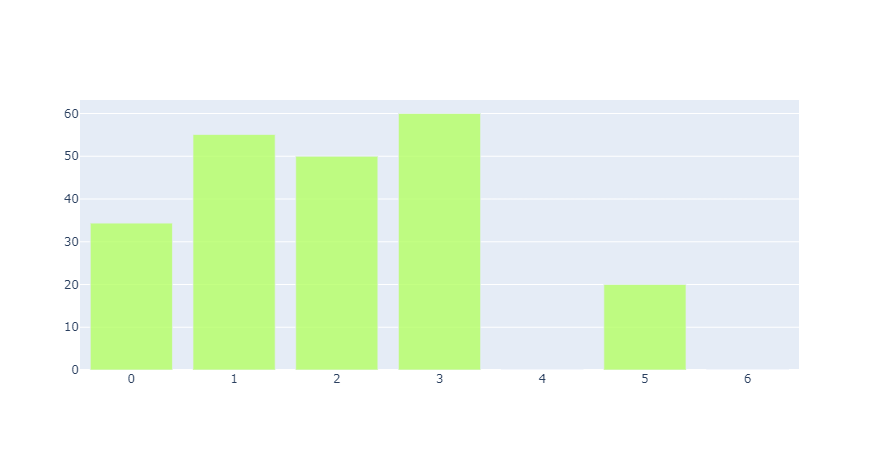

In [ ]:
#Parch vs Survived
percent_live=[100*(len(train_df[(train_df['Parch']==i)&(train_df['Survived']==1)]))/len(train_df[train_df['Parch']==i]) for i in train_df['Parch'].value_counts().index]
data=[go.Bar(
    x=train_df['Parch'].value_counts().index,
    y=percent_live,
    marker=dict(
              color = 'rgba(180, 279, 100, 0.8)'
          ),
)]
#layout=go.Layout(barmode='group')
#fig=dict(data=data,layout=layout)
iplot(data)


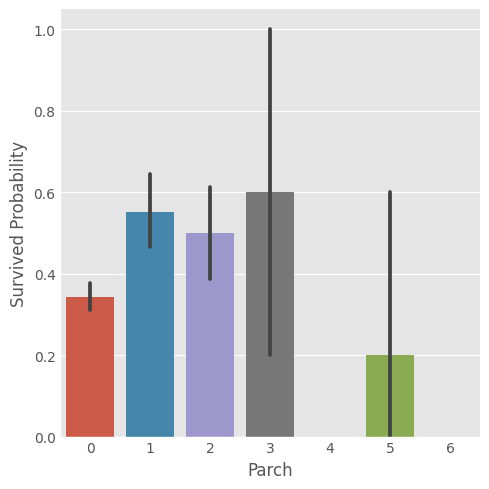

In [ ]:
g = sns.catplot(x = "Parch", y = "Survived", kind = "bar", data = train_df)
g.set_ylabels("Survived Probability")
plt.show()

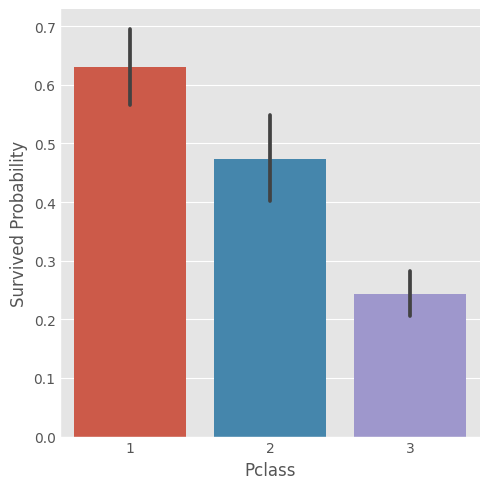

In [ ]:
#Pclass vs Survived
g = sns.catplot(x = "Pclass", y = "Survived", kind = "bar", data = train_df)
g.set_ylabels("Survived Probability")
plt.show()

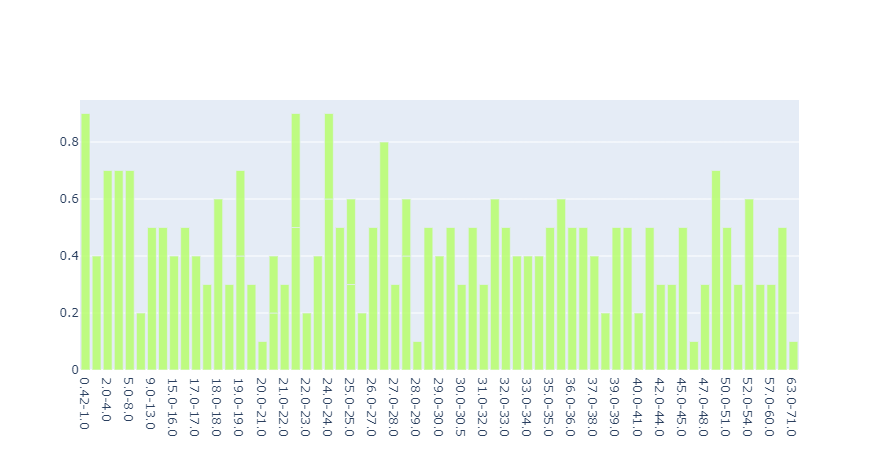

In [ ]:
#Age vs Survived
data=pd.Series()
new_data=pd.DataFrame()
data=train_df[train_df['Age'].notnull()][['Age','Survived']].sort_values(by='Age',ascending=True).reset_index(drop='index')
li1=[len(data.iloc[i:i+10][data['Survived']==1])/10 for i in range(0,len(data),10)]
li2=[str(data['Age'][i])+'-'+str(data['Age'][i+10]) for i in range(0,len(data)-13,10)]
data=[go.Bar(
    x=li2,
    y=li1,
    marker=dict(
              color = 'rgba(180, 279, 100, 0.8)'
          ),
)]
iplot(data)


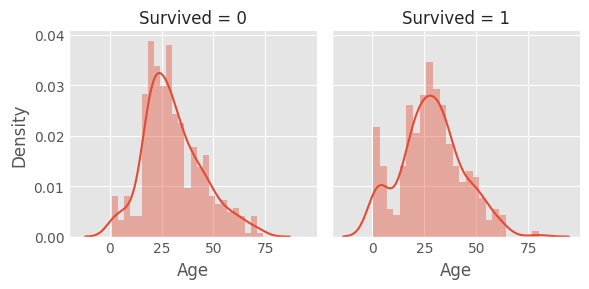

In [ ]:
#Age vs Survived
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

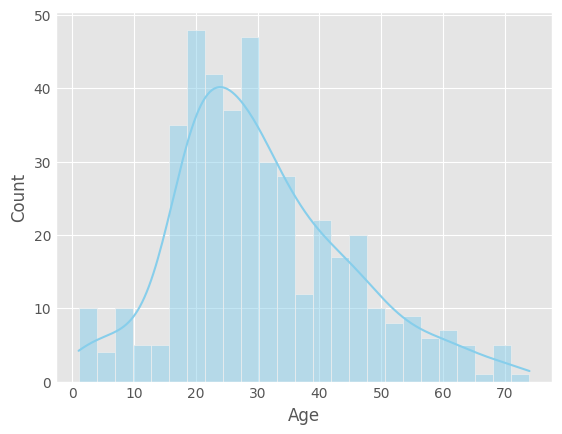

In [ ]:
#Datadaki survived=0 ve survived=1 olanların  yaş dağılımı:
data=train_df.Age[train_df['Survived']==0]
sns.histplot(x=data, bins=25, kde=True, color="skyblue")

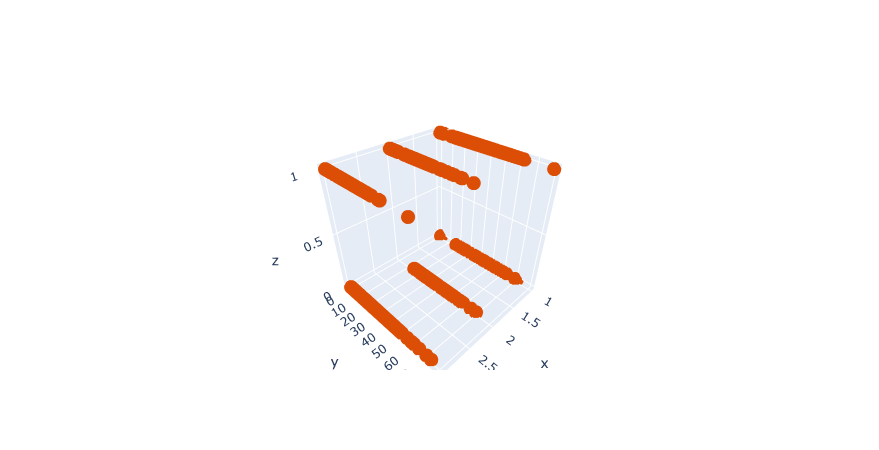

In [ ]:
#Pclass, Survived, Age--3D SCATTER PLOT
data=train_df[['Pclass', 'Age', 'Survived']].copy()
trace1=go.Scatter3d(x=data.Pclass,
                   y=data.Age,
                   z=data.Survived,
                    mode='markers',
                    marker=dict(
                    color='rgb(220,78,5)')
                   )
data1=[trace1]
iplot(data1)

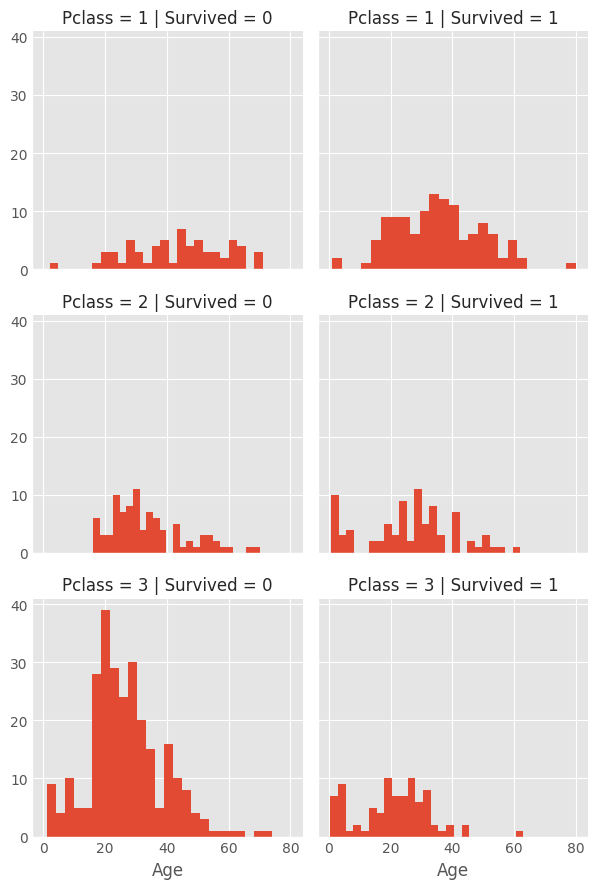

In [ ]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass")
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

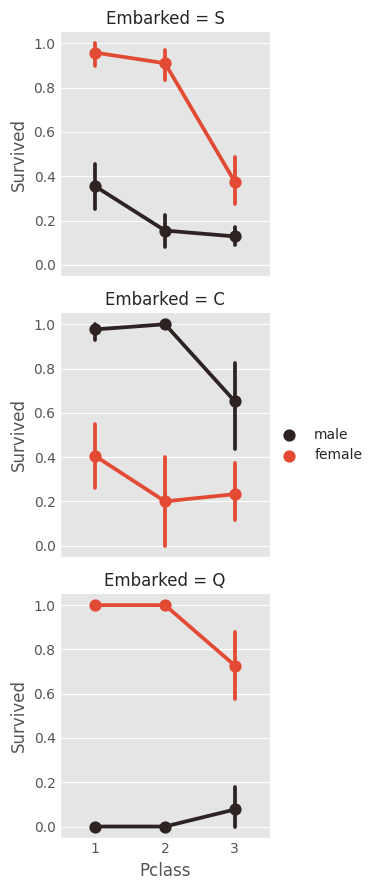

In [ ]:
#Embarked -- Sex -- Pclass -- Survived((1. Class- Embarked=C)  her iki cinsiyet için yaşama olasılığı yüksek)
g = sns.FacetGrid(train_df ,row = "Embarked")
g.map(sns.pointplot,"Pclass","Survived","Sex")
g.add_legend()
plt.show()

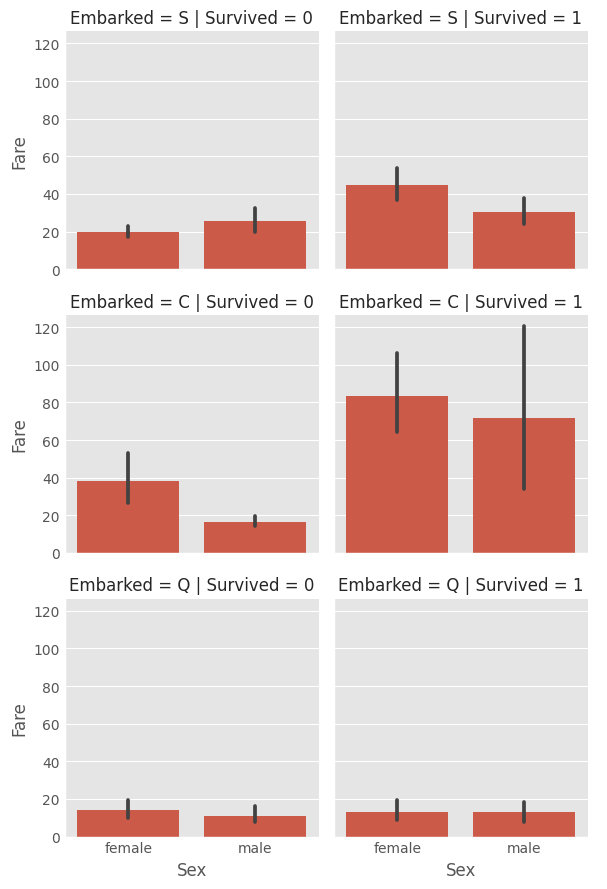

In [ ]:
#Embarked -- Sex -- Fare -- Survived
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived")
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

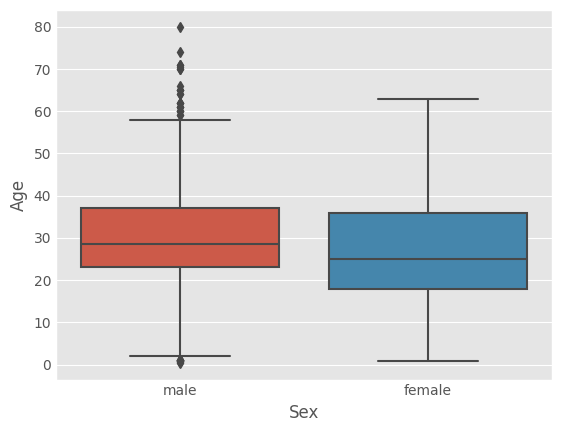

In [ ]:
#Fill in the NaN values of the age column--NaN verileri doldurmak için Feature'lar arasındaki ilişkiye bakılması
sns.boxplot(x='Sex',y='Age',data=train_df)
plt.show()

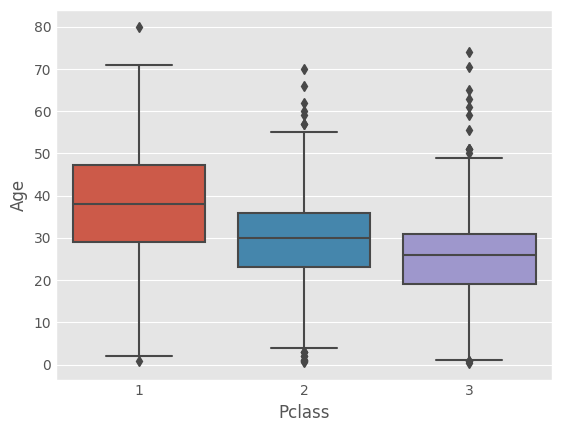

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=train_df)
plt.show()

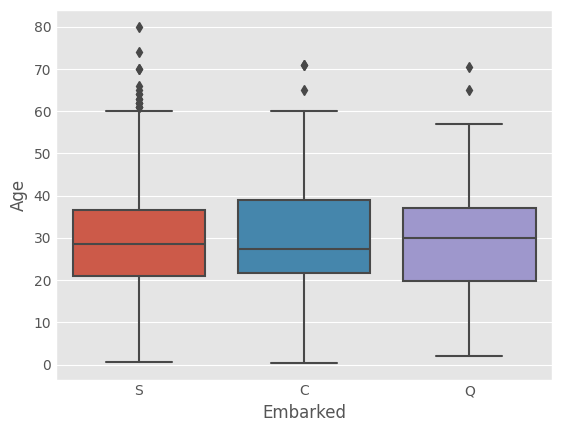

In [ ]:
sns.boxplot(x='Embarked',y='Age',data=train_df)
plt.show()

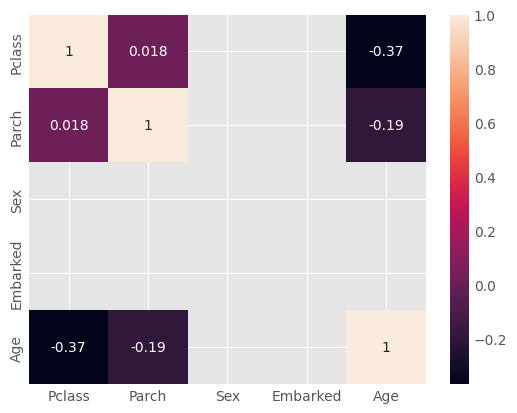

In [ ]:
train_df['Sex']=[0 if i=='male'else 1 for i in train_df['Sex']]
train_df['Embarked']=[0 if i=='S' else 1 if i=='C' else 2 for i in train_df['Embarked']]
li1=['Pclass','Parch','Sex','Embarked','Age']
sns.heatmap(train_df[li1].corr(),annot=True)
plt.show()
#Age sütununun Sex ve Embarked ile arasında bir korelasyon yok.

In [ ]:
#Fill in the NaN values of the age column
index1=train_df[train_df['Age'].isnull()].index
for i in index1:
    value=train_df[(train_df['Pclass']==train_df.iloc[i,:]['Pclass'])&(train_df['Embarked']==train_df.iloc[i,:]['Embarked'])&(train_df['Sex']==train_df.iloc[i,:]['Sex'])&(train_df['Parch']==train_df.iloc[i,:]['Parch'])]['Age'].mean()
    if  value==np.nan:
        train_df.iloc[i,5]=train_df['Age'].mean()
    else:
        train_df.iloc[i,5]=value
train_df[train_df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:


plt.scatter(df.deneyim,df.maas)